In [8]:
import pandas as pd
df = pd.read_csv(r'C:\Users\sai\Desktop/pokemon.csv')
df.head(5)

,abilities,against_bug,against_dark,against_dragon,against_electric,against_fairy,against_fight,against_fire,against_flying,against_ghost,...,percentage_male,pokedex_number,sp_attack,sp_defense,speed,type1,type2,weight_kg,generation,is_legendary
0,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,1,65,65,45,grass,poison,6.9,1,0
1,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,2,80,80,60,grass,poison,13.0,1,0
2,"['Overgrow', 'Chlorophyll']",1.0,1.0,1.0,0.5,0.5,0.5,2.0,2.0,1.0,...,88.1,3,122,120,80,grass,poison,100.0,1,0
3,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,4,60,50,65,fire,NaN,8.5,1,0
4,"['Blaze', 'Solar Power']",0.5,1.0,1.0,1.0,0.5,1.0,0.5,1.0,1.0,...,88.1,5,80,65,80,fire,NaN,19.0,1,0


In [9]:
len(df[df['type2'].isnull()])

417

In [10]:
df = df[df['type2'].isnull()].loc[
    :, ['sp_attack', 'sp_defense', 'attack', 'defense', 'speed', 'hp', 'type1']
]

In [11]:
X = df.iloc[:, :-1].values

In [12]:
from sklearn.preprocessing import normalize

In [13]:
X_norm = normalize(X)

In [14]:
y = df.iloc[:, -1].values

In [15]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [16]:
lda = LinearDiscriminantAnalysis(n_components=5)

In [17]:
lda.fit(X_norm, y)

LinearDiscriminantAnalysis(n_components=5)

In [18]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [19]:
import seaborn as sns
import numpy as np


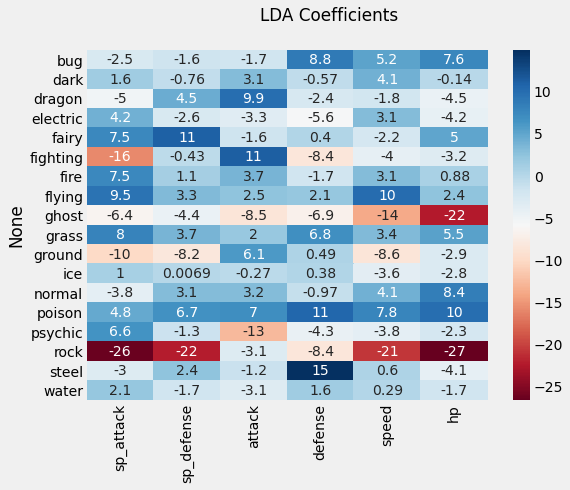

In [24]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
sns.heatmap(pd.DataFrame(lda.coef_, 
                         columns=df.columns[:-1], 
                         index=[lda.classes_]), 
            ax=ax, cmap='RdBu', annot=True)

plt.suptitle('LDA Coefficients')
pass

<AxesSubplot:title={'center':'LDA Class Coefficient Sums'}>

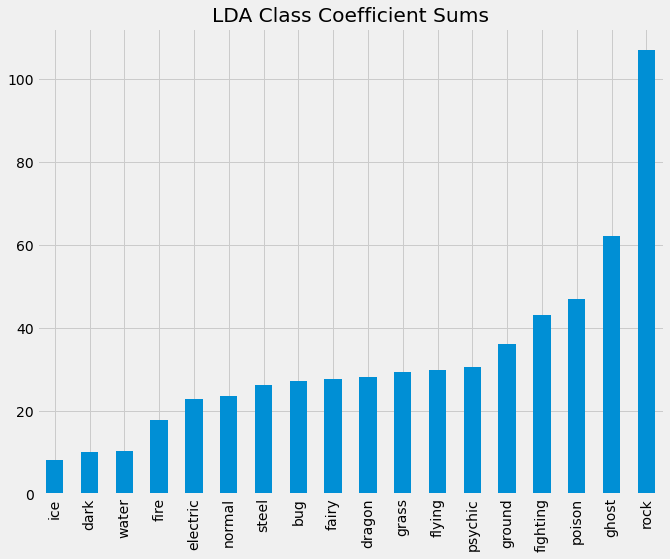

In [25]:
pd.Series(np.abs(lda.coef_).sum(axis=1), index=lda.classes_).sort_values().plot.bar(
    figsize=(10, 8), title="LDA Class Coefficient Sums"
)

In [26]:
lda.explained_variance_ratio_

array([0.49909799, 0.21283156, 0.11987117, 0.07961687, 0.06219906])

In [27]:
X_hat = lda.fit_transform(X, y)

In [28]:
import matplotlib as mpl

In [29]:
colors = mpl.cm.get_cmap(name='tab20').colors
categories = pd.Categorical(pd.Series(y)).categories
ret = pd.DataFrame(
    {'C1': X_hat[:, 0], 'C2': X_hat[:, 1], 'Type': pd.Categorical(pd.Series(y))}
)

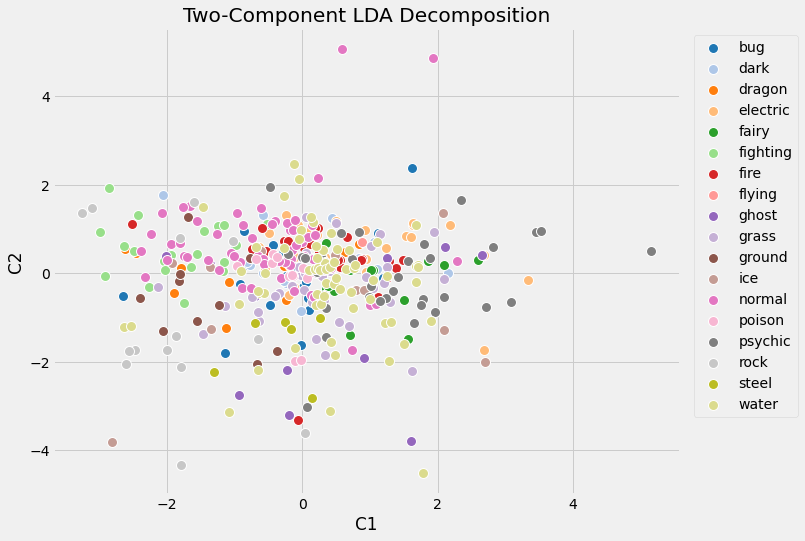

In [32]:
ig, ax = plt.subplots(1, figsize=(10, 8))

for col, cat in zip(colors, categories):
    (ret
         .query('Type == @cat')
         .plot.scatter(x='C1', y='C2', color=col, label=cat, ax=ax,
                       s=100, edgecolor='white', linewidth=1,
                       title='Two-Component LDA Decomposition')
         .legend(bbox_to_anchor=(1.2, 1))
    )